In [1]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"


In [10]:
'''
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s'''

'\nCRIM: Per capita crime rate by town\nZN: Proportion of residential land zoned for lots over 25,000 sq. ft\nINDUS: Proportion of non-retail business acres per town\nCHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX: Nitric oxide concentration (parts per 10 million)\nRM: Average number of rooms per dwelling\nAGE: Proportion of owner-occupied units built prior to 1940\nDIS: Weighted distances to five Boston employment centers\nRAD: Index of accessibility to radial highways\nTAX: Full-value property tax rate per $10,000\nPTRATIO: Pupil-teacher ratio by town\nB: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\nLSTAT: Percentage of lower status of the population\nMEDV: Median value of owner-occupied homes in $1000s'

In [7]:
import pandas as pd
# BHNames = [int(i) for i in range(14)]
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']
data = pd.read_csv(dataset_url,names=BHNames,delim_whitespace=True)
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [15]:
summary = data.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [25]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled,columns=BHNames)
data_scaled

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [28]:
summary = data_scaled.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
crim,506.0,0.040544,0.096679,0.0,0.000851,0.002812,0.041258,1.0
zn,506.0,0.113636,0.233225,0.0,0.000000,0.000000,0.125000,1.0
indus,506.0,0.391378,0.251479,0.0,0.173387,0.338343,0.646628,1.0
chas,506.0,0.069170,0.253994,0.0,0.000000,0.000000,0.000000,1.0
nox,506.0,0.349167,0.238431,0.0,0.131687,0.314815,0.491770,1.0
rm,506.0,0.521869,0.134627,0.0,0.445392,0.507281,0.586798,1.0
age,506.0,0.676364,0.289896,0.0,0.433831,0.768280,0.938980,1.0
dis,506.0,0.242381,0.191482,0.0,0.088259,0.188949,0.369088,1.0
rad,506.0,0.371713,0.378576,0.0,0.130435,0.173913,1.000000,1.0
tax,506.0,0.422208,0.321636,0.0,0.175573,0.272901,0.914122,1.0


In [42]:
X = data_scaled.iloc[:,:13].values
Y = data_scaled.iloc[:,13].values
print(X)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=5)
print("X Shape ",X_train.shape)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]
X Shape  (354, 13)


In [43]:
X_train

array([[0.11987742, 0.        , 0.64662757, ..., 0.80851064, 0.10777145,
        0.61396247],
       [0.0827335 , 0.        , 0.64662757, ..., 0.80851064, 0.24310354,
        0.54608168],
       [0.06408753, 0.        , 0.64662757, ..., 0.80851064, 0.99034243,
        0.16583885],
       ...,
       [0.00194077, 0.        , 0.33834311, ..., 0.70212766, 0.99089717,
        0.43791391],
       [0.00251062, 0.        , 0.37133431, ..., 0.63829787, 0.99488123,
        0.25496689],
       [0.00112701, 0.8       , 0.05315249, ..., 1.        , 0.94740027,
        0.10596026]])

In [44]:
Y_train

array([0.15111111, 0.13333333, 0.41555556, 0.67555556, 0.22666667,
       0.43111111, 0.63111111, 0.59111111, 0.18666667, 0.66444444,
       0.20888889, 0.67555556, 0.45111111, 0.29555556, 0.25777778,
       0.18666667, 0.41333333, 0.5       , 0.38222222, 0.28222222,
       0.20666667, 0.37111111, 0.07555556, 0.22888889, 0.34      ,
       0.6       , 0.33333333, 0.31333333, 0.52666667, 0.91111111,
       0.39111111, 0.42      , 0.37555556, 0.23555556, 1.        ,
       0.44444444, 0.73111111, 0.36888889, 0.31777778, 0.27777778,
       0.39777778, 0.22222222, 0.5       , 0.11555556, 0.41777778,
       0.42      , 0.33555556, 0.25555556, 0.62444444, 0.21333333,
       0.52      , 0.41555556, 0.16222222, 0.58888889, 0.37777778,
       0.16666667, 0.66888889, 0.22      , 0.39777778, 0.39777778,
       0.31777778, 0.32888889, 0.33333333, 0.54666667, 0.34444444,
       0.53333333, 0.34888889, 0.33111111, 0.15333333, 0.        ,
       0.40666667, 0.34666667, 0.39777778, 0.32444444, 0.20222

In [45]:
import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [47]:
model = Sequential()
#First Layer(Input + Hidden)
model.add(Dense(20,input_dim=13,activation="relu"))
#Second Layer(Second Hidden )
model.add(Dense(10,activation="relu"))
#Third Layer (Output Layer)
model.add(Dense(1,activation="linear"))

In [48]:
model.compile(optimizer="Adam",loss="mean_squared_error",metrics=["accuracy"])

In [49]:
model.fit(X_train,Y_train,batch_size=50,epochs=500)

Epoch 1/500
354/354 [==============================] - 0s 889us/step - loss: 0.0944 - accuracy: 0.0085
Epoch 2/500
354/354 [==============================] - 0s 41us/step - loss: 0.0571 - accuracy: 0.0085
Epoch 3/500
354/354 [==============================] - 0s 37us/step - loss: 0.0386 - accuracy: 0.0085
Epoch 4/500
354/354 [==============================] - 0s 36us/step - loss: 0.0292 - accuracy: 0.0085
Epoch 5/500
354/354 [==============================] - 0s 39us/step - loss: 0.0254 - accuracy: 0.0113
Epoch 6/500
354/354 [==============================] - 0s 36us/step - loss: 0.0232 - accuracy: 0.0141
Epoch 7/500
354/354 [==============================] - 0s 36us/step - loss: 0.0218 - accuracy: 0.0198
Epoch 8/500
354/354 [==============================] - 0s 36us/step - loss: 0.0201 - accuracy: 0.0198
Epoch 9/500
354/354 [==============================] - 0s 36us/step - loss: 0.0193 - accuracy: 0.0198
Epoch 10/500
354/354 [==============================] - 0s 39us/step - loss: 0.01

In [55]:
Y_pred = model.predict(X_test)
# print(Y_pred)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test,Y_pred)
# print(cm)

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


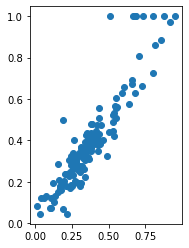

In [80]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_pred,Y_test)


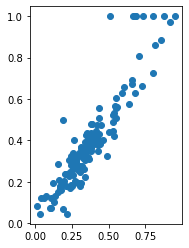

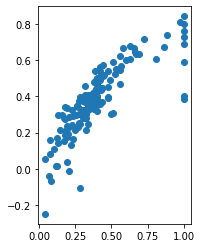

In [82]:
from sklearn.linear_model import LinearRegression
lModel=LinearRegression()
lModel.fit(X_train,Y_train)
ypred=lModel.predict(X_test)
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_pred,Y_test)

plt.figure(2)
plt.subplot(121)
plt.scatter(Y_test,lModel.predict(X_test))
plt.show()